In [190]:
#https://raw.githubusercontent.com/riyaeliza123/imposter-syndrome/main/Imposter%20Syndrome%20csv.csv
#https://raw.githubusercontent.com/riyaeliza123/imposter-syndrome/main/Cleaned%20Imposter%20Syndrome.csv

import pandas as pd
import numpy as np


In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/riyaeliza123/imposter-syndrome/main/Cleaned%20Imposter%20Syndrome.csv')
#df
df = df.drop('S.NO.', 1)
#renaming columns for easy reference
df.rename(columns = {'Do you chalk your success up to fates, luck or\nerror?':'success', 
                     'Many times, you feel crushed by constructive criticism, seeing it as evidence of your "ineptness"?':'many ineptness',
                     'Do you believe "If I can do it, anybody can"?':'if anybody can',
                     'Do you agonize over the smallest flaws in your work?':'agonize',
                     'Do you believe that everything you do must be completely perfect?':'perfect',
                     'In rare cases you feel crushed by constructive criticism, seeing it evidence of your "ineptness"?':'rare ineptness',
                     'Do you feel incompetent despite attaining success?':'incompetent',
                     'You compare your abilities to people around you and think that others may be more intelligent than you.':'compare',
                     'You blame your luck for success rather than hard work':'luck not hard work',
                     'Do you think shortcut to success makes you smarter':'shortcut',
                     'Do you often fear not meeting other people\'s expectations?':'expectations',
                     'I am a perfectionist':'perfectionist',
                     'Do you feel like a non-valuable member of the family if you don\'t participate in domestic work?':'domestic',
                     '"I have to be good at a particular activity to enjoy it" (As in, if you picked up a new hobby like painting, the only way you feel good about doing it is if you are using perfect techniques and doing it the "right" way)':'enjoy activity',
                     'I believe that means is more important than the ends':'means',
                     'When people compliment you, you think you are not as accomplished as they think':'compliment',
                     'Most of your success has been a stroke of luck':'stroke of luck',
                     'You have an above-average IQ score':'IQ score',
                     'Your emotional quotient is better than your general IQ score':'EQ',
                     'You downplay compliments from others.':'no compliments',
                     'Do you feel like an unimportant family member if you don\'t involve in decision-making process?':'not imp',
                     'Which places do you think you can be yourself without being judged?':'place not judged',
                     'What places do you think you pretend to be someone you are not?':'place judged',
                     'At least 70% of individuals have dissatisfaction in their lives. Women mostly face self-image issues and in men, it is driven by the fear of not being successful or letting people down. Do you agree with this? And in your experience, how have you seen variances to the mentioned scenarios?':'letting people down',
                     'As the campus has reopened after conducting classes, examinations, and project reviews online over the past 2 years, do you feel that this might bring up changes in confidence levels, due to the adjustments which may have arisen doubts in self-esteem from the initial change of method?':'post covid confidence',
                     'You have doubts about your abilities despite people around you trusting you.':'trust'

                    }, inplace = True)

#df

#preprocessing
#in the comfort percentage, change all NA to 0
#df1=df[0:5]  #first 6 rows

df.update(df[['comfort.home','comfort.college','comfort.friends', 'comfort.work','comfort.online', 'comfort.alterego']].fillna('0'))
#df

#CONVERT THE DATASET - Left affinity on scale shows imposter syndrome (Q 3-25)
#convert 8,12,18
#ignore 16,25 - gender roles related

#8
df['rare ineptness'] = df['rare ineptness'].replace(['SA','A','D','SD'],['SD','D','A','SA'])

#12
df['shortcut'] = df['shortcut'].replace(['SA','A','D','SD'],['SD','D','A','SA'])

#18
df['means'] = df['means'].replace(['SA','A','D','SD'],['SD','D','A','SA'])

#Select relevent columns
imposter_df=df.iloc[:,0:25]

#remove irrelevent cols
imposter_df.drop(columns=['domestic','not imp'],inplace=True)

#imposter_df
df.to_csv('impostor.csv')

i_df=imposter_df
i_df=i_df.drop(['Age'], axis = 1)
i_df.rename(columns = {'Gender':'gender'}, inplace = True)

#display(i_df)

#i_df['Gender'] = i_df['Gender'].replace({'F': 0})
#i_df['Gender'] = i_df['Gender'].replace({'M': 1})

for i in i_df:
    i_df[i] = i_df[i].fillna('N')

#i_df.to_csv('impostor.csv')

C:\Users\hp\AppData\Local\Temp/ipykernel_13356/4281735061.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('S.NO.', 1)


In [217]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#pass sentence, returns pos/neg
#take each sentence, add all pos, neu and neg and finally give overall sentiment per gender
#make 2 datasets (m,f) and do sentiment analysis

In [218]:
# function to print sentiments of the sentence.
comp=[]
def sentiment_scores(sentence):
 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence) #polarity_scores is predefined, contains neg, neu and pos
    comp.append(sentiment_dict['compound'])
    return comp

In [219]:
def compound_value(df):
    letpep=df.astype(str)
    for i in letpep:
        sentiment_scores(i)
    return comp

In [195]:
df['Letting people down (score)']=compound_value(df['letting people down'])

In [196]:
comp=[]
df['Post covid confidence (score)']=compound_value(df['post covid confidence'])

In [220]:
senti=[]
def find_sentiment(col):
    for i in col:
        if  i>= 0.34 :
            senti.append("Positive")
        elif i<= -0.34 :
            senti.append("Negative")
        else :
            senti.append("Neutral") 
    return senti

In [198]:
df['Letting people down (sentiment)']=find_sentiment(df['Letting people down (score)'])

In [199]:
senti=[]
df['Post covid confidence (sentiment)']=find_sentiment(df['Post covid confidence (score)'])

In [200]:
#df.to_csv('Sentiment scores with values-whole dataset.csv')

In [221]:
#sentiment_scores(df. iat[0,0])
def find_comp(df):
    letpep=df.astype(str)
    for i in letpep:
        sentiment_scores(i)
    
    meancomp=np.mean(comp)
    print(meancomp)
    # decide sentiment as positive, negative and neutral
    if meancomp >= 0.34 :
        print("Positive")
    elif meancomp<= -0.34 :
        print("Negative")
    else :
        print("Neutral") 

In [222]:
dfmale = df[df['Gender'] == 'M']
#print (dfmale)
dffemale = df[df['Gender'] == 'F']
#dffemale

In [224]:
comp=[]
find_comp(dfmale['letting people down'])

0.14915419847328243
Neutral


In [225]:
comp=[]
find_comp(dfmale['post covid confidence'])

0.3918
Positive


In [226]:
comp=[]
find_comp(dffemale['letting people down'])

0.1628268292682927
Neutral


In [227]:
comp=[]
find_comp(dffemale['post covid confidence'])

0.2839219512195122
Neutral


In [207]:
#STARTING VALUES FOR KMEANS
i_df.drop(['agonize','perfect','perfectionist','enjoy activity', 'IQ score', 'EQ', 'means'], axis=1, inplace=True)

In [208]:
#code to assign weights

idf=[]
idf=i_df.iloc[:, 0:15]


weight2=idf.filter(['many ineptness', 'rare ineptness','luck not hard work','shortcut','trust','compliment','stroke of luck'], axis=1)
weight2["SA"] = weight2.apply(lambda row: sum(row[0:7]=="SA") ,axis=1)
weight2["A"] = weight2.apply(lambda row: sum(row[0:7]=="A") ,axis=1)
weight2["N"] = weight2.apply(lambda row: sum(row[0:7]=="N") ,axis=1)
weight2["D"] = weight2.apply(lambda row: sum(row[0:7]=="D") ,axis=1)
weight2["SD"] = weight2.apply(lambda row: sum(row[0:7]=="SD") ,axis=1)

weight2_ctr=weight2[['SA','A','N','D','SD']]
weight2_ctr*=2

weight1=idf.filter(['success','if anybody can','incompetent','compare','expectations','no compliments'], axis=1)
weight1["SA"] = weight1.apply(lambda row: sum(row[0:6]=="SA") ,axis=1)
weight1["A"] = weight1.apply(lambda row: sum(row[0:6]=="A") ,axis=1)
weight1["N"] = weight1.apply(lambda row: sum(row[0:6]=="N") ,axis=1)
weight1["D"] = weight1.apply(lambda row: sum(row[0:6]=="D") ,axis=1)
weight1["SD"] = weight1.apply(lambda row: sum(row[0:6]=="SD") ,axis=1)

weight1_ctr=weight1[['SA','A','N','D','SD']]
weight1_ctr

totalweight=weight1_ctr+weight2_ctr
#totalweight

#Score, accuracy, certainty

#normalize totalweight
totalweight/=20

totalweight["Score"]=(totalweight["SA"]+totalweight["A"]+1-totalweight["N"]+1-(totalweight["SD"]+totalweight["D"]))/5
totalweight["Accuracy"]=totalweight["SA"]-totalweight["SD"]
totalweight["Certainty"]=totalweight["SA"]

#totalweight["SAC"]=totalweight["Certainty"]+

In [209]:
#label

label=[]

for i in totalweight["Score"]:
    if i<0.34:
        label.append("Yes")
    else:
        label.append("No")

totalweight["Label"]=label

In [210]:
totalweight["Certainty"].max()

0.7

In [211]:
#totalweight.to_csv('Corrected score with label.csv')

In [212]:
#3 variable dataframe is reducedtotalweight
#5 variable dataframe is totalweight

reducedtotalweight=pd.DataFrame()

reducedtotalweight["Agree"] = totalweight["SA"] + totalweight["A"]
reducedtotalweight["Disagree"] = totalweight["SD"] + totalweight["D"]
reducedtotalweight["N"] = totalweight["N"] 

reducedtotalweight.rename(columns = {'Agree':'A', 'N':'N','Disagree':'D'},inplace=True)
reducedtotalweight

,A,D,N
0,0.15,0.60,0.25
1,0.30,0.60,0.10
2,0.20,0.55,0.25
3,0.70,0.10,0.20
4,0.15,0.70,0.15
...,...,...,...
195,0.15,0.60,0.25
196,0.35,0.60,0.05
197,0.25,0.50,0.25
198,0.30,0.45,0.25


In [213]:
#KMEANS

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib widget


In [214]:
final=reducedtotalweight
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(final)
print(y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 2 0 0 0 2 2 0 1 1 1 2 1 2 2 2 1 2 1 0 1 2 2 1 0 2 1 0 0 2 1 1 2 0 1
 0 0 2 1 1 2 0 0 2 2 0 2 1 1 1 0 1 1 2 1 2 0 0 2 0 0 2 1 2 0 2 2 1 0 2 1 2
 0 1 0 1 2 1 2 1 2 2 2 1 1 0 1 2 0 2 2 2 0 1 0 1 1 2 0 2 2 1 0 0 0 0 0 2 1
 0 1 1 2 2 1 0 2 2 2 2 1 2 2 1 1 2 0 0 1 1 0 2 2 0 1 0 2 0 1 2 2 2 2 1 1 0
 2 2 2 2 0 2 2 1 1 0 2 1 0 2 0 2 0 1 0 1 0 0 2 1 1 0 2 2 0 0 0 1 1 1 1 0 0
 1 2 1 1 2 0 1 0 0 0 0 0 0 0 2]


In [215]:
final['cluster'] = y  
# the above step adds extra column indicating the cluster number

final1 = final[final.cluster==0]
final2 = final[final.cluster==1]
final3 = final[final.cluster==2]

#display(final)

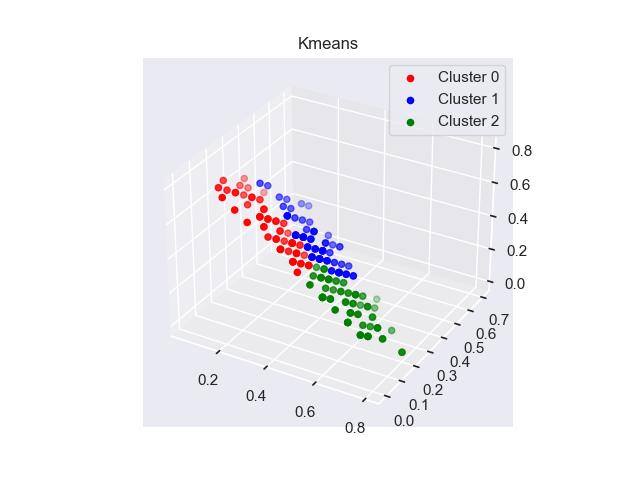

In [216]:
# plotting

xline = np.linspace(0, 0.5,num=100,endpoint=False)
yline = np.linspace(0, 0.5,num=100,endpoint=False)
zline = np.linspace(0, 0.5,num=100,endpoint=False)


# Data for three-dimensional scattered points
kplot = plt.axes(projection='3d')
plt.ion()
kplot.scatter3D(final1.A, final1.N, final1.D,c='red', label = 'Cluster 0')
kplot.scatter3D(final2.A, final2.N, final2.D, c ='blue', label = 'Cluster 1')
kplot.scatter3D(final3.A, final3.N, final3.D,c ='green', label = 'Cluster 2')

plt.legend()
plt.title("Kmeans")
plt.show()